In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
file = pd.read_json("./prompts.json")
prompts = pd.DataFrame(file)
print(prompts)

                                               phrases
0                                                Hey ,
1                                                 Hi ,
2                                              Hello ,
3                                       Good morning ,
4                                     Good afternoon ,
..                                                 ...
563  With 10 years of experience in the mobile indu...
564  Please let me know if you’re interested in col...
565  She will be providing technical support and as...
566  make sure they enjoy the best experience with ...
567                                 Feel free to greet

[568 rows x 1 columns]


In [3]:
tokenizer = Tokenizer()
from tensorflow.keras.preprocessing.sequence import pad_sequences

# assigns each word a unique number/index
tokenizer.fit_on_texts(prompts.phrases)

print(tokenizer.word_index)
# for s in tokenizer.word_index:
    # print(s for s )
# help(tokenizer)

# print(tokenizer.word_index['Hey'])

{'to': 1, 'you': 2, 'i': 3, 'the': 4, 'for': 5, 'your': 6, 'please': 7, 'this': 8, 'a': 9, 'and': 10, 'it': 11, 'in': 12, 'have': 13, 'me': 14, 'my': 15, 'with': 16, 'if': 17, 'would': 18, 'we': 19, 'on': 20, 'be': 21, 'of': 22, 'that': 23, 'our': 24, 'is': 25, 'thank': 26, 'any': 27, 'email': 28, 'as': 29, 'are': 30, 'about': 31, 'so': 32, 'am': 33, 'more': 34, 'know': 35, 'time': 36, 'could': 37, 'let': 38, 'us': 39, 'can': 40, 'like': 41, 'information': 42, 'hope': 43, 'at': 44, 'wanted': 45, 'some': 46, 'attached': 47, 'up': 48, 'help': 49, 'not': 50, 'get': 51, 'wednesday': 52, 'i’m': 53, 'great': 54, 'sorry': 55, 'just': 56, 'appreciate': 57, 'need': 58, 'free': 59, 'best': 60, 'from': 61, 'share': 62, 'was': 63, 'writing': 64, 'all': 65, 'here': 66, 'do': 67, 'will': 68, 'last': 69, 'i’d': 70, 'thanks': 71, 'had': 72, 'make': 73, 'what': 74, 'love': 75, 'keep': 76, 'inform': 77, 'may': 78, 'an': 79, 'out': 80, 'questions': 81, 'again': 82, 'look': 83, 'feedback': 84, 'work': 85,

In [4]:
def sentence_to_padded_sequences(phrases):
    
  input_sequences = []
  # loop for each given sentence in list of sentences phrases
  for phrase in phrases:
    
    # texts_to_sequences convert the sentence to list of indexes corresponding to word in dictionary
    tokenized_sentence = tokenizer.texts_to_sequences([phrase])[0]
    # print(tokenized_sentence)
    # training for each sentence by iterating over no. of words taken to train in an iteration
    for i in range(len(tokenized_sentence)):
      input_sequences.append(tokenized_sentence[:i+1])
  global vectorLength 
  vectorLength = max([len(x) for x in input_sequences])
  
  # empty list of sequences initialized
  padded_input_sequences = []
  
  # padded_input_sequences put zeroes in place of empty words
  # e.g. my sentence is                      -   "I hope this email finds you well"
  # after mapping to index in dectionary     -   "3  42   7    28    444   2  212"  
  # padding of zeros are added in beginnning -   "0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 42 7 28 444 2 212" 
  # now the length of vector becomes 25 with zeros added
  padded_input_sequences = pad_sequences(input_sequences, maxlen = vectorLength, padding='pre')
  return padded_input_sequences

X = sentence_to_padded_sequences(prompts.phrases)
print(X)
# print(X[24])

[[  0   0   0 ...   0   0 287]
 [  0   0   0 ...   0   0 288]
 [  0   0   0 ...   0   0 289]
 ...
 [  0   0   0 ...   0 101  59]
 [  0   0   0 ... 101  59   1]
 [  0   0   0 ...  59   1 859]]


In [5]:
X = sentence_to_padded_sequences(prompts.phrases)[:,:-1]
y = sentence_to_padded_sequences(prompts.phrases)[:,-1]
print(y)
dictionaryLength = len(tokenizer.word_index)

from tensorflow.keras.utils import to_categorical

# convert the desired values to an array where all values are zero except at dictionary index which is one
y = to_categorical(y,num_classes=dictionaryLength+1)

[287 288 289 ...  59   1 859]


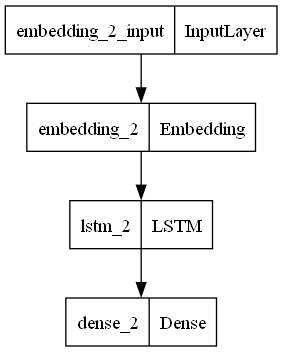

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# creating our LSTM model
model = Sequential()
model.add(Embedding(dictionaryLength+1, 400, input_length=vectorLength-1))
model.add(LSTM(dictionaryLength+1))
model.add(Dense( dictionaryLength+1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# model.summary()
tf.keras.utils.plot_model(model)

In [9]:
model.fit(X,y,epochs=10)



Epoch 1/10


151/151 [==============================] - 81s 448ms/step - loss: 5.7166 - accuracy: 0.0735
Epoch 2/10
151/151 [==============================] - 66s 438ms/step - loss: 4.9335 - accuracy: 0.1347
Epoch 3/10
151/151 [==============================] - 61s 407ms/step - loss: 4.1224 - accuracy: 0.2167
Epoch 4/10
151/151 [==============================] - 63s 416ms/step - loss: 3.2874 - accuracy: 0.3216
Epoch 5/10
151/151 [==============================] - 56s 369ms/step - loss: 2.5132 - accuracy: 0.4252
Epoch 6/10
151/151 [==============================] - 64s 422ms/step - loss: 1.8653 - accuracy: 0.5643
Epoch 7/10
151/151 [==============================] - 65s 427ms/step - loss: 1.4340 - accuracy: 0.6687
Epoch 8/10
151/151 [==============================] - 61s 402ms/step - loss: 1.2309 - accuracy: 0.7129
Epoch 9/10
151/151 [==============================] - 58s 384ms/step - loss: 1.1249 - accuracy: 0.7343
Epoch 10/10
151/151 [==============================] - 60s 400ms/step -

In [10]:
def predict(sentence: str):
    """
    Prints the word predictions based on a given sentence, limited to a maximum of N words
    ## Parameters
    sentence : string which is the initial sentence 
    """
    for i in range(5):
        
        # tokenize
        token_text = tokenizer.texts_to_sequences([sentence])[0]
        
        # padding
        padded_token_text = pad_sequences([token_text], maxlen=vectorLength-1, padding='pre')
        
        # predict
        arr = model.predict(padded_token_text)
        print(max(arr[0]))

        # if it is predicting 6th word and if it's probability is lower than 0.2 it should not predict word as it will be absurd predictions
        if(max(arr[0]) < 0.20 and i>4):
            break
        pos = np.argmax(arr)
        for word,index in tokenizer.word_index.items():
            if index == pos:
                sentence = sentence + " " + word
                print(sentence)


text = "could you"
predict(text)

1/1 [==============================] - 2s 2s/step
0.99998933
could you please
1/1 [==============================] - 0s 59ms/step
0.99991584
could you please repeat
1/1 [==============================] - 0s 137ms/step
0.9999583
could you please repeat what
1/1 [==============================] - 0s 54ms/step
0.9999882
could you please repeat what you
1/1 [==============================] - 0s 64ms/step
0.9999573
could you please repeat what you said


In [14]:
predict("i have")

1/1 [==============================] - 0s 57ms/step
0.9999481
i have attached
1/1 [==============================] - 0s 58ms/step
0.999972
i have attached the
1/1 [==============================] - 0s 54ms/step
0.9999935
i have attached the required
1/1 [==============================] - 0s 80ms/step
0.9999968
i have attached the required documents
1/1 [==============================] - 0s 86ms/step
0.99999845
i have attached the required documents for


In [20]:
predict("to whom")

1/1 [==============================] - 0s 94ms/step
0.9999182
to whom it
1/1 [==============================] - 0s 72ms/step
0.9999902
to whom it may
1/1 [==============================] - 0s 71ms/step
0.99999696
to whom it may concern
1/1 [==============================] - 0s 66ms/step
0.99946356
to whom it may concern some
1/1 [==============================] - 0s 75ms/step
0.99999034
to whom it may concern some additional


In [11]:
# import json
# saving the model and the dictionary in the extension folder
# import joblib
# joblib.dump(model, "./extension/model")
# model.save("./extension/model.h5")
# tokenizer_json = tokenizer.to_json()
# with open('./extension/tokenizer.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(tokenizer_json, ensure_ascii=True))

In [12]:
# model.save("model")
# import tensorflowjs
# tensorflowjs.converters.save_keras_model(model, "extension")
# model_json = model.to_json()
# with open("./extension/model.json", "w") as f:
#     json.dump(model_json, f, indent=4)